# Jupyter Notbook for phoneme coverage analysis

This jupyter notebook checks dataset configured in config.json for phoneme coverage.
As mentioned here https://github.com/mozilla/TTS/wiki/Dataset#what-makes-a-good-dataset a good phoneme coverage is recommended.

Most parameters will be taken from config.json file in mozilla tts repo so please ensure it's configured correctly for your dataset.
This notebook used lots of existring code from the TTS repo to ensure future compatibility.

This analysis logic is based on feedback and code snipplets from the amazing Neil Stoker (https://discourse.mozilla.org/u/nmstoker/summary), so all honor to him.

I provide this notebook without any warrenty but it's hopefully useful for your dataset analysis.

Happy TTS'ing :-)

Thorsten Müller

* https://github.com/thorstenMueller/deep-learning-german-tts
* https://discourse.mozilla.org/t/contributing-my-german-voice-for-tts/

In [1]:
# set some vars
TTS_PATH = "/home/thorsten/___dev/tts/thorstenMueller"
CONFIG_FILE = "/home/thorsten/___dev/tts/thorstenMueller/TTS/config.json"
CHARS_TO_REMOVE = ".,:!?'"

In [2]:
cd $TTS_PATH

/home/thorsten/___dev/tts/thorstenMueller


In [3]:
# import stuff
sys.path.append(TTS_PATH)
from TTS.utils.text import *
from TTS.datasets.preprocess import load_meta_data
from TTS.utils.io import load_config
from tqdm import tqdm
from matplotlib import pylab as plt

# extra imports not included in requirements.txt
import collections
import operator


In [4]:
# Load config.json properties
CONFIG = load_config(CONFIG_FILE)

# Load some properties from config.json
CONFIG_METADATA = load_meta_data(CONFIG.datasets)[0]
CONFIG_DATASET = CONFIG.datasets[0]
CONFIG_PHONEME_LANGUAGE = CONFIG.phoneme_language
CONFIG_TEXT_CLEANER = CONFIG.text_cleaner
CONFIG_ENABLE_EOS_BOS_CHARS = CONFIG.enable_eos_bos_chars

# Will be printed on generated output graph
CONFIG_RUN_NAME = CONFIG.run_name
CONFIG_RUN_DESC = CONFIG.run_description

In [5]:
# print some debug information on loaded config values
print(" > Run name: " + CONFIG_RUN_NAME + " (" + CONFIG_RUN_DESC + ")")
print(" > Dataset files: " + str(len(CONFIG_METADATA)))
print(" > Phoneme language: " + CONFIG_PHONEME_LANGUAGE)
print(" > Used text cleaner: " + CONFIG_TEXT_CLEANER)
print(" > Enable eos bos chars: " + str(CONFIG_ENABLE_EOS_BOS_CHARS))

 > Run name: thorsten-de (github.com/thorstenMueller/deep-learning-german-tts)
 > Dataset files: 22442
 > Phoneme language: de
 > Used text cleaner: phoneme_cleaners
 > Enable eos bos chars: False


In [6]:
# Get phonemes from metadata
phonemes = []

for phrase in tqdm(CONFIG_METADATA):
    if len(phrase[0]) > 0:
        tmpPhrase = phrase[0].rstrip('\n')
        for removeChar in CHARS_TO_REMOVE:
            tmpPhrase = tmpPhrase.replace(removeChar,"")
        
        seq = phoneme_to_sequence(tmpPhrase, [CONFIG_TEXT_CLEANER], CONFIG_PHONEME_LANGUAGE, CONFIG_ENABLE_EOS_BOS_CHARS)
        text = sequence_to_phoneme(seq)
        text = text.replace(" ","")
        phonemes.append(text)

  0%|          | 13/22442 [00:00<27:31, 13.58it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
  1%|          | 193/22442 [00:13<25:19, 14.64it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
  1%|          | 211/22442 [00:14<25:51, 14.33it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
  1%|          | 227/22442 [00:15<25:31, 14.51it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flag

[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 10%|▉         | 2187/22442 [02:34<23:36, 14.29it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 10%|▉         | 2195/22442 [02:35<23:26, 14.39it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 10%|▉         | 2227/22442 [02:37<24:30, 13.75it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 10%|█         | 2281/22442 [02:41<24:23, 13.78it/s][WARNING] fount 1 utterances containing language swit

 15%|█▌        | 3425/22442 [04:02<21:51, 14.50it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 16%|█▌        | 3511/22442 [04:08<23:54, 13.20it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 16%|█▌        | 3561/22442 [04:12<22:13, 14.16it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 16%|█▌        | 3583/22442 [04:13<21:48, 14.41it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep

[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 22%|██▏       | 5021/22442 [05:54<20:08, 14.42it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 23%|██▎       | 5135/22442 [06:03<20:08, 14.33it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 23%|██▎       | 5147/22442 [06:03<20:48, 13.85it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 24%|██▎       | 5317/22442 [06:15<19:35, 14.57it/s][WARNING] fount 1 utterances containing language swit

 31%|███▏      | 7055/22442 [08:18<17:26, 14.70it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 32%|███▏      | 7099/22442 [08:21<17:41, 14.45it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 32%|███▏      | 7173/22442 [08:26<17:54, 14.22it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
[WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 32%|███▏      | 7193/22442 [08:27<1

[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 39%|███▉      | 8703/22442 [10:14<15:47, 14.49it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 39%|███▉      | 8745/22442 [10:17<16:21, 13.96it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 39%|███▉      | 8767/22442 [10:18<16:03, 14.19it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 39%|███▉      | 8839/22442 [10:23<15:52, 14.28it/s][WARNING] fount 1 utterances containing language swit

[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 48%|████▊     | 10687/22442 [12:33<13:42, 14.29it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 48%|████▊     | 10727/22442 [12:36<13:36, 14.35it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 48%|████▊     | 10745/22442 [12:37<13:42, 14.23it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 49%|████▉     | 10941/22442 [12:51<13:37, 14.07it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear i

 57%|█████▋    | 12871/22442 [15:07<11:02, 14.45it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 57%|█████▋    | 12883/22442 [15:08<11:13, 14.20it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 58%|█████▊    | 13037/22442 [15:18<10:47, 14.54it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 58%|█████▊    | 13055/22442 [15:20<10:29, 14.90it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "

[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 64%|██████▍   | 14463/22442 [17:00<09:13, 14.42it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 64%|██████▍   | 14473/22442 [17:01<09:15, 14.34it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 65%|██████▍   | 14481/22442 [17:02<09:28, 14.01it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 65%|██████▍   | 14487/22442 [17:02<09:46, 13.57it/s][WARNING] fount 1 utterances containing language 

[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 72%|███████▏  | 16263/22442 [19:07<06:57, 14.79it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 73%|███████▎  | 16281/22442 [19:08<07:07, 14.39it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 73%|███████▎  | 16291/22442 [19:09<07:20, 13.96it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 73%|███████▎  | 16311/22442 [19:10<07:24, 13.81it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear i

 79%|███████▉  | 17697/22442 [20:49<05:27, 14.47it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 79%|███████▉  | 17729/22442 [20:51<05:21, 14.67it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 79%|███████▉  | 17747/22442 [20:52<05:36, 13.95it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 80%|███████▉  | 17871/22442 [21:01<05:24, 14.10it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "

 94%|█████████▍| 21177/22442 [24:54<01:28, 14.25it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 95%|█████████▍| 21249/22442 [24:59<01:24, 14.06it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 95%|█████████▌| 21337/22442 [25:06<01:15, 14.63it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "keep-flags" policy)
 96%|█████████▌| 21463/22442 [25:15<01:10, 13.80it/s][WARNING] fount 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "de" phoneset
[WARNING] language switch flags have been kept (applying "

In [7]:
s = ""
phonemeString = s.join(phonemes)

d = {}
collections._count_elements(d, phonemeString)
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))

# remove useless keys
sorted_d.pop(' ', None)
sorted_d.pop('ˈ', None)

print("Dataset contains " + str(len(sorted_d)) + " different ipa phonemes.")

Dataset contains 49 different ipa phonemes.


In [8]:
print("5 rarest phonemes")

rareList = dict(sorted(sorted_d.items(), key=operator.itemgetter(1), reverse=False)[:5])
for key, value in rareList.items():
    print(key + " --> " + str(value) + " occurrences")

5 rarest phonemes
ð --> 1 occurrences
θ --> 2 occurrences
œ --> 7 occurrences
ʌ --> 9 occurrences
ɹ --> 30 occurrences


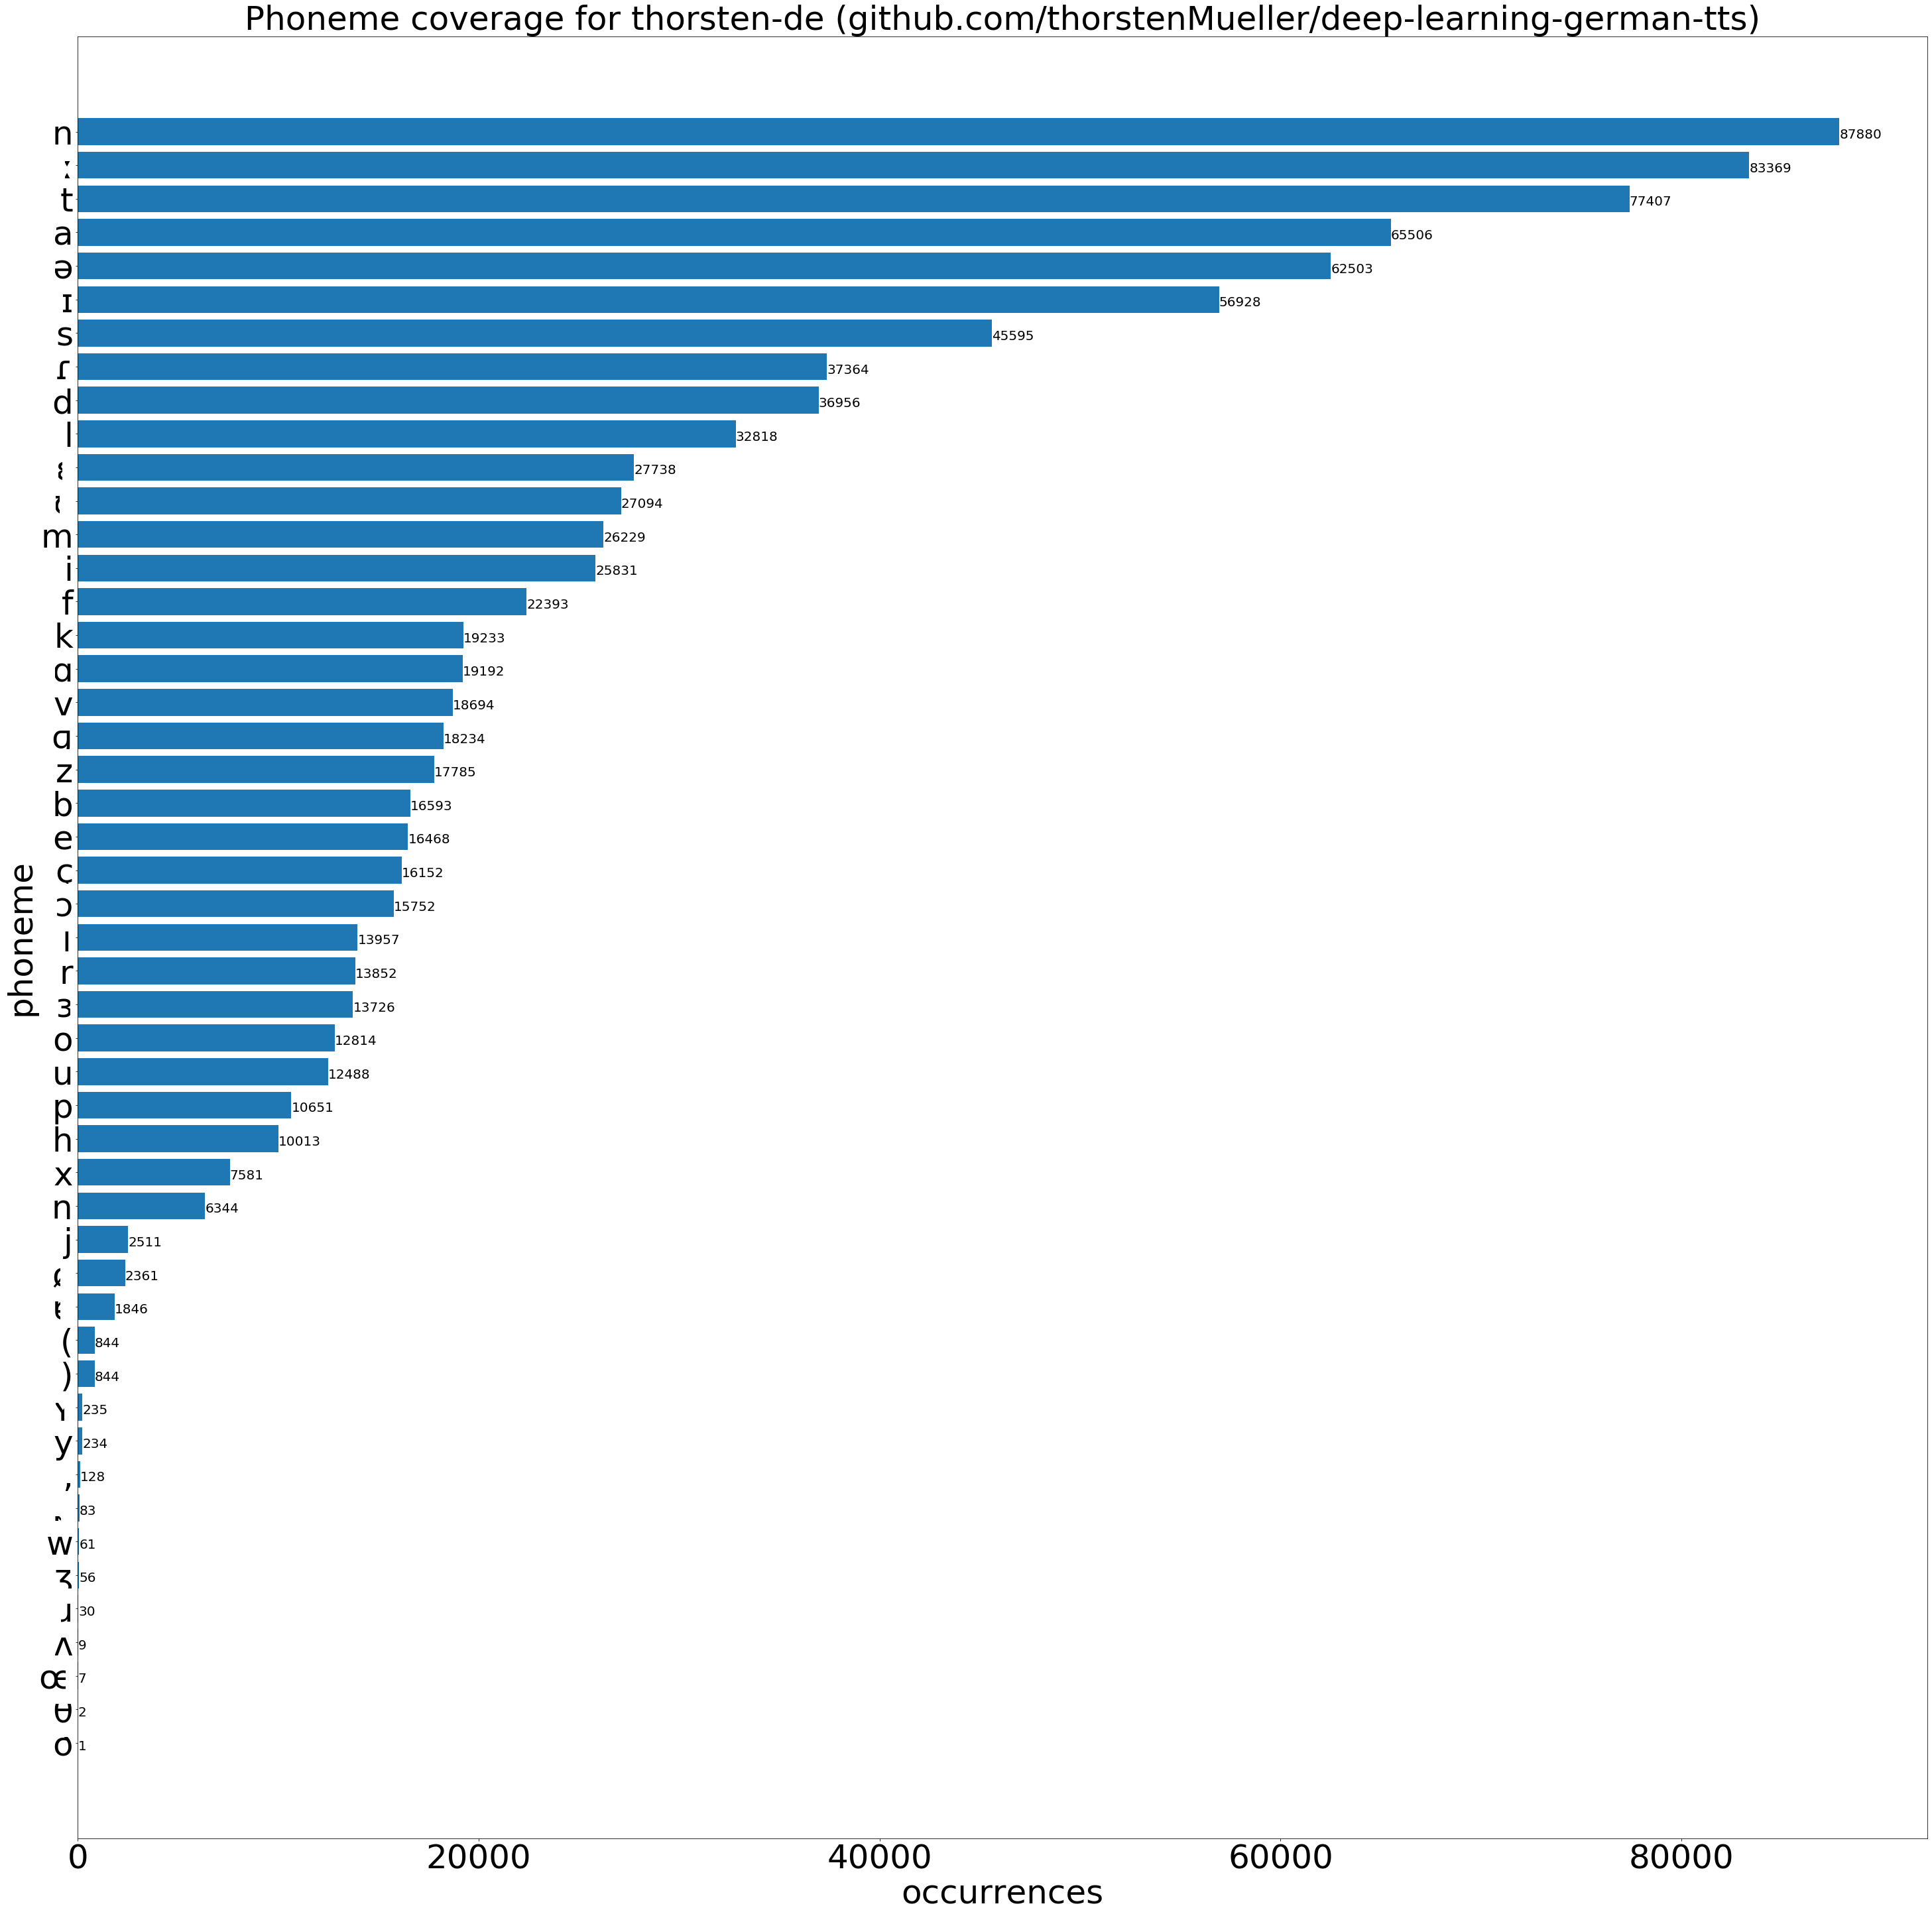

In [9]:
# create plot from analysis result

x = []
y = []

for key, value in sorted_d.items():
    x.append(key)
    y.append(value)

plt.figure(figsize=(50,50))
plt.title("Phoneme coverage for " + CONFIG_RUN_NAME + " (" + CONFIG_RUN_DESC + ")", fontsize=50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.barh(x,y, align='center', alpha=1.0)
plt.gca().invert_yaxis()
plt.ylabel('phoneme', fontsize=50)
plt.xlabel('occurrences', fontsize=50)

for i, v in enumerate(y):
    plt.text(v + 2, i + .2, str(v), fontsize=20)
    
plt.show()